# Practice Session 01+02: Data preparation

Author: <font color="blue">Leticia Martín Cabrera</font>

E-mail: <font color="blue">leticia.martin03@estudiant.upf.edu</font>

Date: <font color="blue">04/10/2021</font>

# 1. Exploratory data analysis 

In [614]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [615]:
input_dataset = pd.read_csv("data/device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [616]:
input_dataset.head(n= 3)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00000,nan,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.00000,12.00000,12.00000,12.00000,20041220.00000,nan,172.00000,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20170401.00000,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.00000,0.00000,0.00000,0.00000,20170405.00000,20.00000,20.00000,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00000,nan,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.00000,0.00000,0.00000,0.00000,20040412.00000,nan,176.00000,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [617]:
device_value =input_dataset.DEVICE_VALUE
i = 0
for column_name in input_dataset.columns:
    print(column_name," ",device_value[i] , " has type ", input_dataset[column_name].dtype)
    i +=1


PURCHASED_DEVICE   393.0  has type  object
DEVICE_VALUE   345.0  has type  float64
LAST_DEVICE_CHANGE   875.0  has type  float64
DATA_TRAFFIC_MONTH_1   345.0  has type  float64
DATA_TRAFFIC_MONTH_2   609.0  has type  float64
DATA_TRAFFIC_MONTH_3   297.0  has type  float64
DATA_TRAFFIC_MONTH_4   345.0  has type  float64
DATA_TRAFFIC_MONTH_5   3465.0  has type  float64
DATA_TRAFFIC_MONTH_6   415.0  has type  float64
VOICE_TRAFFIC_MONTH_1   345.0  has type  float64
VOICE_TRAFFIC_MONTH_2   321.0  has type  float64
VOICE_TRAFFIC_MONTH_3   321.0  has type  float64
VOICE_TRAFFIC_MONTH_4   921.0  has type  float64
VOICE_TRAFFIC_MONTH_5   201.0  has type  float64
VOICE_TRAFFIC_MONTH_6   255.0  has type  float64
BILLING_MONTH_1   255.0  has type  float64
BILLING_MONTH_2   255.0  has type  float64
BILLING_MONTH_3   255.0  has type  float64
BILLING_MONTH_4   3081.0  has type  float64
BILLING_MONTH_5   345.0  has type  float64
BILLING_MONTH_6   345.0  has type  float64
DEVICE_COST_MONTH_1   297.0  

In [618]:
float_dataset = input_dataset.select_dtypes(include=["float64"])
for column_name in float_dataset.columns:
    print(column_name, " ", float_dataset[column_name].mean(), " ",float_dataset[column_name].std(), " ", float_dataset[column_name].max(), " ", float_dataset[column_name].min())
    

DEVICE_VALUE   750.4842105263158   979.7102724723517   9057.0   15.0
LAST_DEVICE_CHANGE   20166984.767248113   10925.774865371366   20190501.0   20121001.0
DATA_TRAFFIC_MONTH_1   3481.825663377724   6364.5427057468205   127017.59   0.0
DATA_TRAFFIC_MONTH_2   3649.9577950784233   6444.357603134135   111948.84   0.0
DATA_TRAFFIC_MONTH_3   3653.4269589293094   6382.603998682972   111948.84   0.0
DATA_TRAFFIC_MONTH_4   3269.440625173109   5675.546605640704   87856.414   0.0
DATA_TRAFFIC_MONTH_5   3673.3683414304946   6589.399406275383   121834.81   0.0
DATA_TRAFFIC_MONTH_6   3427.689578208464   5885.423021919695   90550.609   0.0
VOICE_TRAFFIC_MONTH_1   154.8522102255611   218.2505901654829   4220.1001   0.0
VOICE_TRAFFIC_MONTH_2   142.56787687317018   200.57437104528668   3132.1001   0.0
VOICE_TRAFFIC_MONTH_3   141.71245755066127   198.54383629473182   2992.5   0.0
VOICE_TRAFFIC_MONTH_4   143.1492345468576   200.50704540791767   3163.3   0.0
VOICE_TRAFFIC_MONTH_5   154.27731784479172   21

In [619]:
for column_name in input_dataset.columns:
    print("*************************",column_name,"*************************")
    print(input_dataset[column_name].describe(), "\n")

************************* PURCHASED_DEVICE *************************
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object 

************************* DEVICE_VALUE *************************
count   9690.00000
mean     750.48421
std      979.71027
min       15.00000
25%      297.00000
50%      393.00000
75%      609.00000
max     9057.00000
Name: DEVICE_VALUE, dtype: float64 

************************* LAST_DEVICE_CHANGE *************************
count       7682.00000
mean    20166984.76725
std        10925.77487
min     20121001.00000
25%     20160801.00000
50%     20170601.00000
75%     20171001.00000
max     20190501.00000
Name: LAST_DEVICE_CHANGE, dtype: float64 

************************* DATA_TRAFFIC_MONTH_1 *************************
count     8868.00000
mean 

The two difference between both results are that with the describe() function we obtain the absolute frequency and quartiles.

## 1.2. Inventory of device models

In [620]:
def item_frequency(data):
    if type(data) == pd.core.series.Series:
        return data.value_counts().rename("frequency")
    else: 
        return pd.Series(Counter(data)).rename("frequency")
    
print("************************PURCHASED DEVICE***********************\n",item_frequency(input_dataset["PURCHASED_DEVICE"]))
print("\n************************PREVIOUS DEVICE MODEL***********************\n",item_frequency(input_dataset["PREVIOUS_DEVICE_MODEL"]))



************************PURCHASED DEVICE***********************
 TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07    5379
TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P1769/07     451
TGAL03462000_ALCATEL 5033J SMART PRETO                    353
TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI107/04       255
TGSA31962007_SAMSUNG J410G SMART PRETO PPB/PI107/04       223
                                                         ... 
TGSA31464007_SAMSUNG J600GT SMART PRETO PPB/PI324/14        1
DGAP08423000_APPLE IPHONE XR 256GB BRANCO                   1
TGSA29664000_SAMSUNG G950 SMART PRETO PPB/PI324/14          1
TGSA31162000_SAMSUNG G9650 SMART PRETO PPB/PI107/04         1
TGSA33764000_SAMSUNG A205G SMART PRETO PPB/PI324/14         1
Name: frequency, Length: 101, dtype: int64

************************PREVIOUS DEVICE MODEL***********************
 iPhone 7                    425
iPhone 6                    250
Samsung Galaxy J5           243
iPhone 6S                   212
Samsung Gal

# 2. Feature engineering

## 2.1. Missing values management

In [621]:
for column_name in input_dataset.columns:
    if input_dataset[column_name].isna().sum() > 0:
        print(column_name, " ", input_dataset[column_name].isna().sum())

PURCHASED_DEVICE   147
DEVICE_VALUE   310
LAST_DEVICE_CHANGE   2318
DATA_TRAFFIC_MONTH_1   1132
DATA_TRAFFIC_MONTH_2   1159
DATA_TRAFFIC_MONTH_3   1154
DATA_TRAFFIC_MONTH_4   1183
DATA_TRAFFIC_MONTH_5   1134
DATA_TRAFFIC_MONTH_6   1465
VOICE_TRAFFIC_MONTH_1   1132
VOICE_TRAFFIC_MONTH_2   1159
VOICE_TRAFFIC_MONTH_3   1154
VOICE_TRAFFIC_MONTH_4   1183
VOICE_TRAFFIC_MONTH_5   1134
VOICE_TRAFFIC_MONTH_6   1465
BILLING_MONTH_1   1
BILLING_MONTH_2   2
BILLING_MONTH_3   8
BILLING_MONTH_4   11
BILLING_MONTH_5   13
BILLING_MONTH_6   21
DEVICE_COST_MONTH_1   1
DEVICE_COST_MONTH_2   2
DEVICE_COST_MONTH_3   8
DEVICE_COST_MONTH_4   11
DEVICE_COST_MONTH_5   13
DEVICE_COST_MONTH_6   21
LINE_ACTIVATION_DATE   821
MONTHS_LAST_DEVICE   2318
DURATION_LINE   821
PREVIOUS_DEVICE_MODEL   3831
PREVIOUS_DEVICE_MANUF   3831
PREVIOUS_DEVICE_BRAND   3831


In [622]:
new_dataset = input_dataset
new_dataset = new_dataset.dropna(subset = ["PURCHASED_DEVICE", "DEVICE_VALUE", "PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_BRAND"])


In [623]:
new_dataset.loc[:,'DATA_TRAFFIC_MONTH_1':'DEVICE_COST_MONTH_6'] = new_dataset.loc[:,'DATA_TRAFFIC_MONTH_1':'DEVICE_COST_MONTH_6'].fillna(0)


C:\Users\letic\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [624]:

new_dataset["LINE_ACTIVATION_DATE"] = new_dataset["LINE_ACTIVATION_DATE"].fillna(new_dataset["LAST_DEVICE_CHANGE"])


C:\Users\letic\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [625]:
new_dataset.head(10)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00000,nan,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.00000,12.00000,12.00000,12.00000,20041220.00000,nan,172.00000,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20170401.00000,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.00000,0.00000,0.00000,0.00000,20170405.00000,20.00000,20.00000,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00000,nan,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.00000,0.00000,0.00000,0.00000,20040412.00000,nan,176.00000,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20171001.00000,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.00000,6.00000,6.00000,6.00000,20110825.00000,14.00000,88.00000,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00000,20190101.00000,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.00000,0.00000,0.00000,0.00000,20140617.00000,-1.00000,54.00000,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00000,20170901.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.50000,...,0.00000,0.00000,0.00000,0.00000,20170905.00000,15.00000,15.00000,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20150701.00000,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.89999,...,0.00000,0.00000,0.00000,0.00000,20100809.00000,41.00000,100.00000,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00000,20170101.00000,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.89999,...,13.00000,13.00000,13.00000,13.00000,20121029.00000,23.00000,74.00000,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.00000,20181101.00000,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.30000,...,0.00000,0.00000,0.00000,0.00000,20120509.00000,1.00000,79.00000,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20141101.00000,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.70000,...,0.00000,0.00000,0.00000,0.00000,20141130.00000,49.00000,49.00000,Samsung Galaxy J5,Samsung Korea,Samsung


In [626]:
print("The original dimensions of the dataset are", input_dataset.shape, "(rows,columns)")
print("The new dimensions of the dataset are", new_dataset.shape, "(rows,columns)")
print("Columns that contain NaN values: ")
for column_name in new_dataset.columns:
    if new_dataset[column_name].isna().sum() > 0:
        print(column_name)

The original dimensions of the dataset are (10000, 33) (rows,columns)
The new dimensions of the dataset are (5988, 33) (rows,columns)
Columns that contain NaN values: 
LAST_DEVICE_CHANGE
LINE_ACTIVATION_DATE
MONTHS_LAST_DEVICE
DURATION_LINE


## 2.2. Distributions, outliers, and correlations

Text(0, 0.5, 'FREQUENCY')

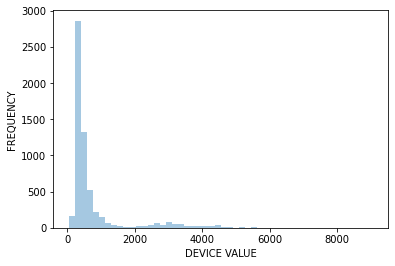

In [627]:
sns.distplot(new_dataset["DEVICE_VALUE"], kde = False)
plt.xlabel('DEVICE VALUE')
plt.ylabel('FREQUENCY')


The histogram of device value has a chi_square distribution since it has a high increasement and has a right tail . Also, we can observe that there is one clear peak so we can say that is an unimodal distribution.

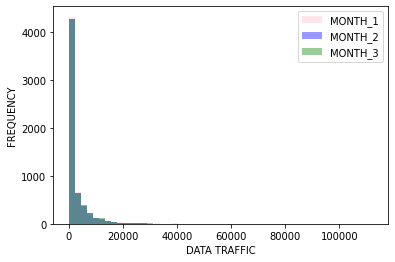

In [628]:
sns.distplot(new_dataset["DATA_TRAFFIC_MONTH_1"], color="pink", label='MONTH_1', kde = False)
sns.distplot(new_dataset["DATA_TRAFFIC_MONTH_2"], color='b',label ='MONTH_2', kde = False )
sns.distplot(new_dataset["DATA_TRAFFIC_MONTH_3"], color='g', label ='MONTH_3',kde = False)
plt.xlabel('DATA TRAFFIC')
plt.ylabel('FREQUENCY')
plt.legend()

This plot shows that the three variables (DATA_TRAFFIC_MONTH_1, DATA_TRAFFIC_MONTH_3, DATA_TRAFFIC_MONTH_3) follow an exponential distribution. We can not appreciate an important diference between them.

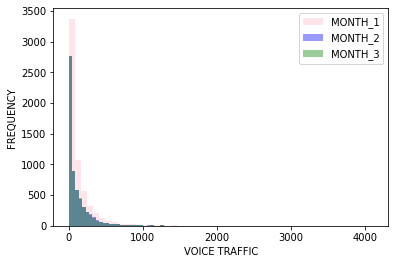

In [629]:
sns.distplot(new_dataset["VOICE_TRAFFIC_MONTH_1"], color="pink", label='MONTH_1', kde = False)
sns.distplot(new_dataset["VOICE_TRAFFIC_MONTH_2"], color='b',label ='MONTH_2', kde = False )
sns.distplot(new_dataset["VOICE_TRAFFIC_MONTH_3"], color='g', label ='MONTH_3',kde = False)
plt.xlabel('VOICE TRAFFIC')
plt.ylabel('FREQUENCY')
plt.legend()


Voice traffic attribute also follows an exponential distribution as data traffic. We can observe that the values of the first months are higher than the other ones.

Text(0, 0.5, 'FREQUENCY')

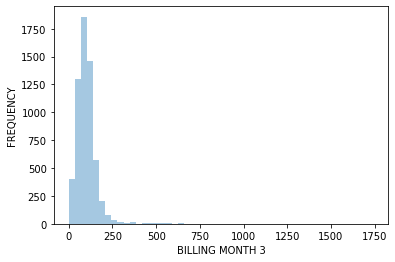

In [630]:
sns.distplot(new_dataset["BILLING_MONTH_3"], kde = False)
plt.xlabel("BILLING MONTH 3")
plt.ylabel('FREQUENCY')


This histogram shows a chi-square distribution since the values increase significantly at the beginning of the graph and it has a right tail

Text(0, 0.5, 'FREQUENCY')

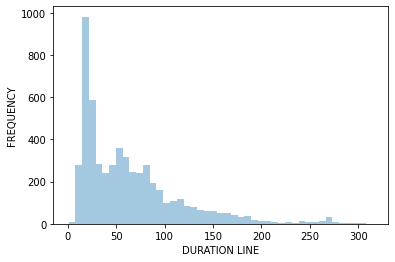

In [631]:
sns.distplot(new_dataset["DURATION_LINE"], kde = False)
plt.xlabel("DURATION LINE")
plt.ylabel('FREQUENCY')


Clearly this plot follows a chi-square distribution since we can observe a large right tail.

Text(0, 0.5, 'FREQUENCY')

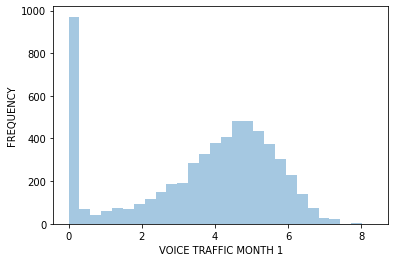

In [632]:
sns.distplot(np.log(new_dataset["VOICE_TRAFFIC_MONTH_1"]+1), kde = False)
plt.xlabel("VOICE TRAFFIC MONTH 1")
plt.ylabel('FREQUENCY')


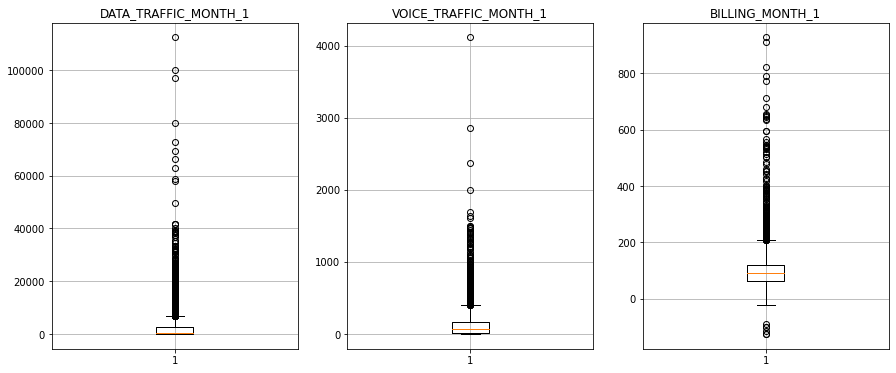

In [633]:
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.boxplot(new_dataset['DATA_TRAFFIC_MONTH_1'])
plt.title('DATA_TRAFFIC_MONTH_1')
plt.grid(True)

plt.subplot(132)
plt.boxplot(new_dataset['VOICE_TRAFFIC_MONTH_1'])
plt.grid(True)
plt.title('VOICE_TRAFFIC_MONTH_1')

plt.subplot(133)
plt.boxplot(new_dataset['BILLING_MONTH_1'])
plt.grid(True)
plt.title('BILLING_MONTH_1')

plt.show()

In the first boxplot we can observe that there are a lot of outliers and the most part of them are below 40000 Mbps. Then, I would use the value 40000 as threshold.

In the boxplot of voice data traffic I would choose 1600 as threshold since the amount of outliers dicrease a lot from this value approximately.

The last boxplot shows many outliers between the values 200 and 600 so I would set the threshold at 600

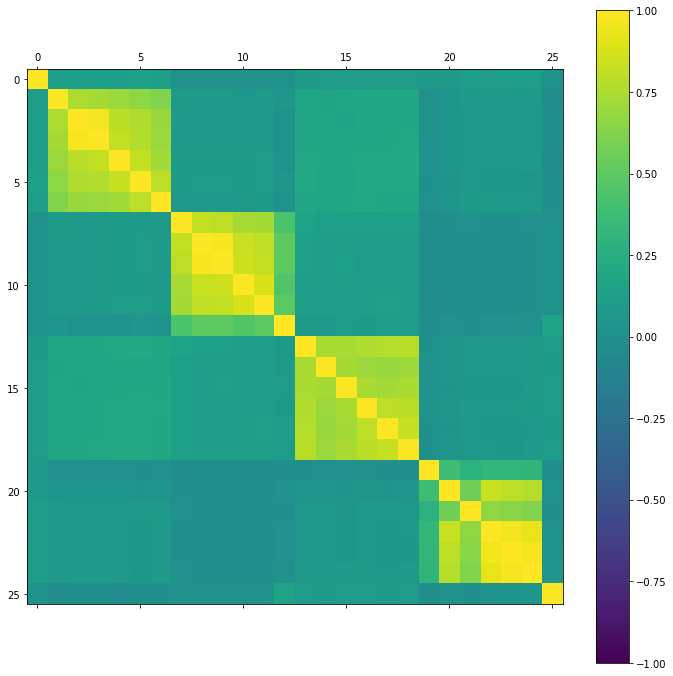

In [634]:
corr_data = new_dataset.drop(columns=['PURCHASED_DEVICE', 'LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'])
corr = corr_data.corr()


figure = plt.figure(figsize= (12,12))
fig = figure.add_subplot(111)
ax = fig.matshow(corr, vmin = -1 , vmax = 1)
figure.colorbar(ax)




In [635]:
new_dataset.corr()

,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,...,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE
DEVICE_VALUE,1.00000,0.00816,0.11656,0.11392,0.11552,0.11857,0.12640,0.11878,0.02395,0.02727,...,0.09846,0.07903,0.08172,0.11582,0.10675,0.11228,0.11491,-0.02622,-0.00144,0.02507
LAST_DEVICE_CHANGE,0.00816,1.00000,-0.00300,0.00143,-0.00248,-0.01003,-0.00993,-0.02142,0.00699,0.00975,...,-0.10915,0.07828,0.16548,0.15157,0.18694,0.17812,0.16972,0.28999,-0.96866,-0.27533
DATA_TRAFFIC_MONTH_1,0.11656,-0.00300,1.00000,0.75633,0.73107,0.70135,0.66193,0.62349,0.09150,0.07117,...,0.19221,0.01315,0.05302,0.08214,0.07877,0.08184,0.08275,0.00524,-0.00299,-0.01039
DATA_TRAFFIC_MONTH_2,0.11392,0.00143,0.75633,1.00000,0.97499,0.79013,0.76066,0.68921,0.08066,0.08259,...,0.19769,0.01279,0.04806,0.06321,0.06859,0.06962,0.07210,-0.00805,-0.00220,0.00563
DATA_TRAFFIC_MONTH_3,0.11552,-0.00248,0.73107,0.97499,1.00000,0.81451,0.77102,0.69648,0.08232,0.08446,...,0.20406,0.01362,0.05028,0.06495,0.06988,0.07083,0.07304,-0.00863,0.00082,0.00565
DATA_TRAFFIC_MONTH_4,0.11857,-0.01003,0.70135,0.79013,0.81451,1.00000,0.82676,0.72107,0.08621,0.08746,...,0.21951,0.01215,0.04813,0.06740,0.06531,0.06839,0.07157,0.01416,0.00974,-0.01652
DATA_TRAFFIC_MONTH_5,0.12640,-0.00993,0.66193,0.76066,0.77102,0.82676,1.00000,0.80376,0.08906,0.09381,...,0.22332,0.00733,0.03449,0.07254,0.05657,0.05820,0.06108,-0.00850,0.01358,0.00380
DATA_TRAFFIC_MONTH_6,0.11878,-0.02142,0.62349,0.68921,0.69648,0.72107,0.80376,1.00000,0.07920,0.07607,...,0.20046,0.01457,0.05086,0.09087,0.07110,0.07418,0.07912,-0.00529,0.02008,0.00177
VOICE_TRAFFIC_MONTH_1,0.02395,0.00699,0.09150,0.08066,0.08232,0.08621,0.08906,0.07920,1.00000,0.81529,...,0.13661,-0.00870,0.00057,0.00911,0.00355,0.00657,0.01129,-0.01579,-0.00639,0.01712
VOICE_TRAFFIC_MONTH_2,0.02727,0.00975,0.07117,0.08259,0.08446,0.08746,0.09381,0.07607,0.81529,1.00000,...,0.11826,-0.00629,0.00473,-0.00324,0.00150,0.00162,0.00393,-0.02049,0.00560,0.02802


Data_traffic_month_5 is the most correlated variable with the device_value and the less correlated variable is Last_device_change. Although these two are the most and least correlated variables, there is not a big difference between them as neither of them is highly correlated with the device_value variable.

## 2.3. Date management and period calculation

In [636]:
new_dataset_date = pd.to_datetime(new_dataset['LAST_DEVICE_CHANGE'], format='%Y%m%d', errors='ignore')
today = pd.to_datetime("today")
new_dataset['MONTHS_LAST_DEVICE'] = ((today-new_dataset_date)/np.timedelta64(1,'M'))
new_dataset['MONTHS_LAST_DEVICE']

C:\Users\letic\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0           nan
1      54.22881
2           nan
3      48.21637
4      33.20168
         ...   
9994        nan
9995   54.22881
9996   42.23678
9997        nan
9999        nan
Name: MONTHS_LAST_DEVICE, Length: 5988, dtype: float64

In [637]:
new_dataset_date  = pd.to_datetime(new_dataset['LINE_ACTIVATION_DATE'], format='%Y%m%d')
today = pd.to_datetime("today")
new_dataset['DURATION_LINE'] = ((today-new_dataset_date)/np.timedelta64(1,'D'))

new_dataset['DURATION_LINE']

C:\Users\letic\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      6135.55552
1      1646.55552
2      6387.55552
3      3696.55552
4      2669.55552
          ...    
9994   2299.55552
9995   1632.55552
9996   3117.55552
9997   3888.55552
9999   3888.55552
Name: DURATION_LINE, Length: 5988, dtype: float64

In [638]:
years_average = (pd.to_datetime(np.mean(new_dataset['DURATION_LINE']), format='%Y%m%d', errors='ignore'))/365
print("The average of duration line is aproximatle", round(years_average))

The average of duration line is aproximatle 8.0


## 2.4. Standarization of numerical variables

In [639]:
columns = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1' ,'DEVICE_COST_MONTH_1']
scaler = StandardScaler()
new_columns = ['DATA_TRAFFIC_MONTH_1_STAND', 'VOICE_TRAFFIC_MONTH_1_STAND', 'BILLING_MONTH_1_STAND' ,'DEVICE_COST_MONTH_1_STAND']
new_dataset = pd.concat([new_dataset, pd.DataFrame(columns = new_columns)])
new_dataset[new_columns] = scaler.fit_transform(new_dataset[columns])


Text(0, 0.5, 'FREQUENCY')

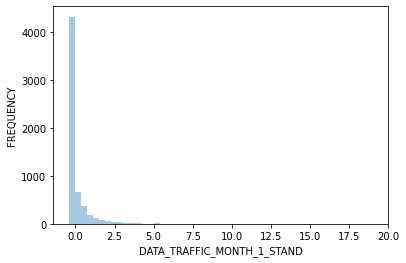

In [640]:
sns.distplot(new_dataset['DATA_TRAFFIC_MONTH_1_STAND'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

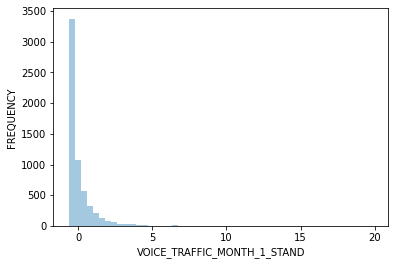

In [641]:
sns.distplot(new_dataset['VOICE_TRAFFIC_MONTH_1_STAND'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

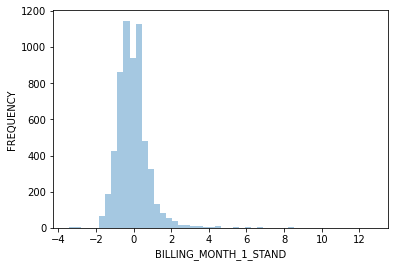

In [642]:
sns.distplot(new_dataset['BILLING_MONTH_1_STAND'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

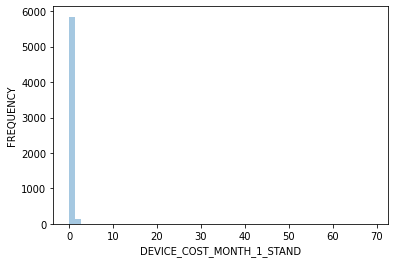

In [643]:
sns.distplot(new_dataset['DEVICE_COST_MONTH_1_STAND'],  kde=False)
plt.ylabel("FREQUENCY")


In [644]:
transformer = Normalizer()
new_columns = ['DATA_TRAFFIC_MONTH_1_NORM', 'VOICE_TRAFFIC_MONTH_1_NORM', 'BILLING_MONTH_1_NORM' ,'DEVICE_COST_MONTH_1_NORM']
new_dataset = pd.concat([new_dataset, pd.DataFrame(columns = new_columns)])
new_dataset[new_columns] = transformer.fit_transform(new_dataset[columns])


Text(0, 0.5, 'FREQUENCY')

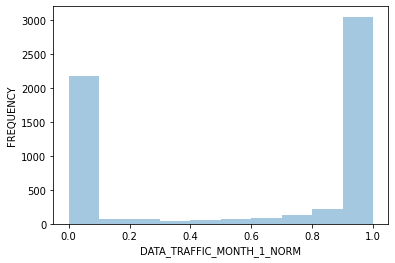

In [645]:
sns.distplot(new_dataset['DATA_TRAFFIC_MONTH_1_NORM'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

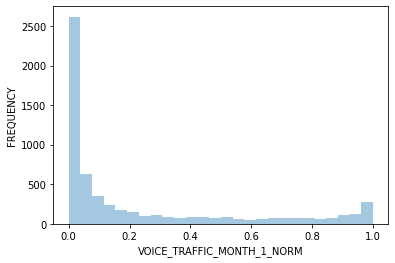

In [646]:
sns.distplot(new_dataset['VOICE_TRAFFIC_MONTH_1_NORM'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

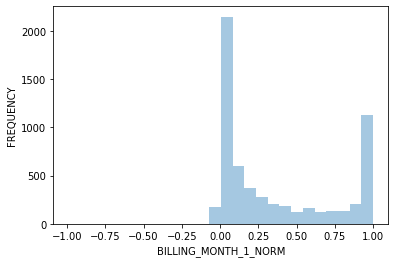

In [647]:
sns.distplot(new_dataset['BILLING_MONTH_1_NORM'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

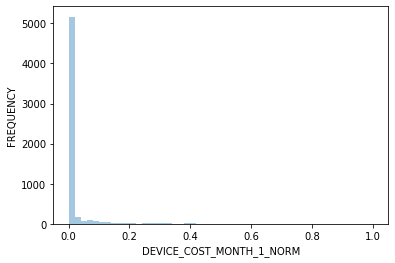

In [648]:
sns.distplot(new_dataset['DEVICE_COST_MONTH_1_NORM'],  kde=False)
plt.ylabel("FREQUENCY")


In [649]:
scaler = MinMaxScaler()
new_columns = ['DATA_TRAFFIC_MONTH_1_MINMAXSC', 'VOICE_TRAFFIC_MONTH_1_MINMAXSC', 'BILLING_MONTH_1_MINMAXSC' ,'DEVICE_COST_MONTH_1_MINMAXSC']
new_dataset = pd.concat([new_dataset, pd.DataFrame(columns = new_columns)])
new_dataset[new_columns] =scaler.fit_transform(new_dataset[columns])

Text(0, 0.5, 'FREQUENCY')

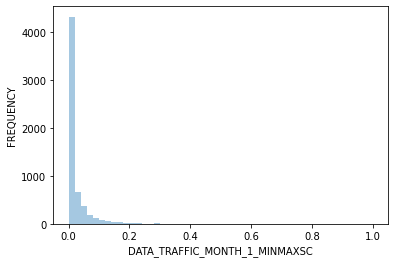

In [650]:
sns.distplot(new_dataset['DATA_TRAFFIC_MONTH_1_MINMAXSC'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

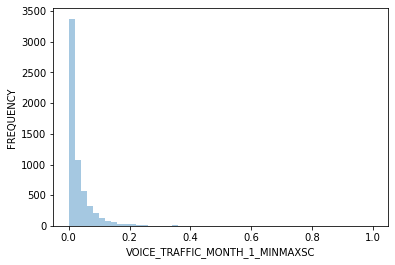

In [651]:
sns.distplot(new_dataset['VOICE_TRAFFIC_MONTH_1_MINMAXSC'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

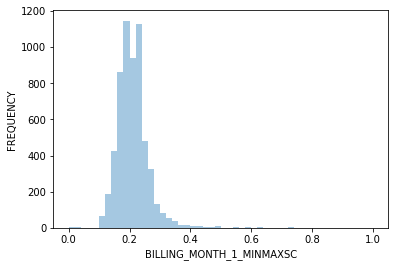

In [652]:
sns.distplot(new_dataset['BILLING_MONTH_1_MINMAXSC'],  kde=False)
plt.ylabel("FREQUENCY")


Text(0, 0.5, 'FREQUENCY')

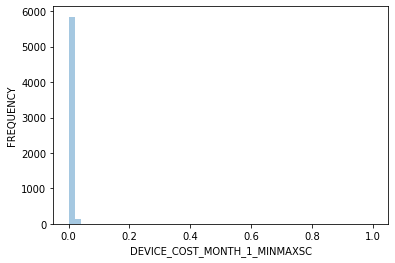

In [653]:
sns.distplot(new_dataset['DEVICE_COST_MONTH_1_MINMAXSC'],  kde=False)
plt.ylabel("FREQUENCY")


We can observe that the only one that is bimodal is the distribution of billing month 1 since it has two intervals over the rest of values and they reach the same frequency.

## 2.5. Convert categorical columns to dummy binary variables

In [654]:
dev_brand = new_dataset['PREVIOUS_DEVICE_BRAND']
dev_brand = np.array(dev_brand).reshape(-1,1)
encoder = LabelEncoder()
new_dataset["PREVIOUS_DEVICE_BRAND"] = encoder.fit_transform(dev_brand)
new_dataset = pd.get_dummies(new_dataset, columns = ["PREVIOUS_DEVICE_BRAND"])


C:\Users\letic\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [655]:
dev_model = new_dataset['PREVIOUS_DEVICE_MODEL']
dev_model = np.array(dev_model).reshape(-1,1)
encoder = LabelEncoder()
new_dataset["PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD"] = encoder.fit_transform(new_dataset['PREVIOUS_DEVICE_MODEL'])
new_dataset

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DATA_TRAFFIC_MONTH_1_MINMAXSC,VOICE_TRAFFIC_MONTH_1_MINMAXSC,BILLING_MONTH_1_MINMAXSC,DEVICE_COST_MONTH_1_MINMAXSC,PREVIOUS_DEVICE_BRAND_0,PREVIOUS_DEVICE_BRAND_1,PREVIOUS_DEVICE_BRAND_2,PREVIOUS_DEVICE_BRAND_3,PREVIOUS_DEVICE_BRAND_4,PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00000,nan,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,0.00414,0.01155,0.20103,0.00186,0,0,1,0,0,274
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20170401.00000,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.00207,0.00090,0.16368,0.00000,0,0,0,0,1,435
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00000,nan,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.00431,0.00635,0.23463,0.00000,0,0,1,0,0,264
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20171001.00000,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,0.03785,0.04272,0.17593,0.00093,1,0,0,0,0,566
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00000,20190101.00000,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.04460,0.09334,0.22379,0.00000,0,0,0,1,0,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00000,nan,11032.31700,5755.06540,5755.06540,5290.14750,2917.54980,4494.50200,597.79999,...,0.09813,0.14534,0.27451,0.00000,1,0,0,0,0,568
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00000,20170401.00000,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,0.21816,0.06018,0.16886,0.00000,1,0,0,0,0,571
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00000,20180401.00000,1007.76560,335.01740,335.01740,171.91273,555.69421,425.69946,88.50000,...,0.00896,0.02152,0.24691,0.00140,0,0,0,0,1,443
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00000,nan,189.17578,155.54840,155.54840,51.75594,62.37141,230.53328,38.50000,...,0.00168,0.00936,0.28668,0.00000,0,0,1,0,0,264


## 2.6. Feature generation

In [656]:
data_dataset = new_dataset.loc[:, "DATA_TRAFFIC_MONTH_1": "DATA_TRAFFIC_MONTH_6"]
new_dataset["DATA_TRAFFIC_MEAN"] = data_dataset.mean()
new_dataset["DATA_TRAFFIC_MAX"] = data_dataset.max(axis=1)
new_dataset["DATA_TRAFFIC_MIN"] = data_dataset.min(axis=1)
new_dataset["DATA_TRAFFIC_RANGE"] = data_dataset.max(axis=1) - data_dataset.min(axis=1)

voice_dataset = new_dataset.loc[:, "VOICE_TRAFFIC_MONTH_1": "VOICE_TRAFFIC_MONTH_6"]
new_dataset["VOICE_TRAFFIC_MEAN"] = voice_dataset.mean(axis=1)
new_dataset["VOICE_TRAFFIC_MAX"] = voice_dataset.max(axis=1)
new_dataset["VOICE_TRAFFIC_MIN"] = voice_dataset.min(axis=1)
new_dataset["VOICE_TRAFFIC_RANGE"] = voice_dataset.max(axis=1) - voice_dataset.min(axis=1)

billing_dataset = new_dataset.loc[:, "BILLING_MONTH_1": "BILLING_MONTH_6"]
new_dataset["BILLING_MEAN"] = billing_dataset.mean(axis=1)
new_dataset["BILLING_MAX"] = billing_dataset.max(axis=1)
new_dataset["BILLING_MIN"] = billing_dataset.min(axis=1)
new_dataset["BILLING_RANGE"] = billing_dataset.max(axis=1) - billing_dataset.min(axis=1)

device_cost_dataset = new_dataset.loc[:, "DEVICE_COST_MONTH_1": "DEVICE_COST_MONTH_6"]
new_dataset["DEVICE_COST_MEAN"] = device_cost_dataset.mean(axis=1)
new_dataset["DEVICE_COST_MAX"] = device_cost_dataset.max(axis=1)
new_dataset["DEVICE_COST_MIN"] = device_cost_dataset.min(axis=1)
new_dataset["DEVICE_COST_RANGE"] = device_cost_dataset.max(axis=1) - device_cost_dataset.min(axis=1)

new_dataset

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00000,nan,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,21.80000,57.90000,92.95833,107.93000,85.00000,22.93000,12.00000,12.00000,12.00000,0.00000
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20170401.00000,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.50000,4.40000,49.43500,56.56000,47.00000,9.56000,0.00000,0.00000,0.00000,0.00000
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00000,nan,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,26.10000,192.60000,121.78167,129.14000,113.77000,15.37000,0.00000,0.00000,0.00000,0.00000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20171001.00000,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,119.00000,112.20000,58.21667,60.93000,55.99000,4.94000,6.00000,6.00000,6.00000,0.00000
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00000,20190101.00000,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.00000,383.89999,109.70000,110.69000,107.99000,2.70000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00000,nan,11032.31700,5755.06540,5755.06540,5290.14750,2917.54980,4494.50200,597.79999,...,512.09998,289.80004,176.40500,204.96000,160.57000,44.39000,0.00000,0.00000,0.00000,0.00000
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00000,20170401.00000,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,119.70000,134.00000,52.48667,52.97000,51.67000,1.30000,0.00000,0.00000,0.00000,0.00000
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00000,20180401.00000,1007.76560,335.01740,335.01740,171.91273,555.69421,425.69946,88.50000,...,0.00000,88.50000,134.99000,134.99000,134.99000,0.00000,9.00000,9.00000,9.00000,0.00000
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00000,nan,189.17578,155.54840,155.54840,51.75594,62.37141,230.53328,38.50000,...,0.00000,38.50000,157.48000,203.53000,134.99000,68.54000,0.00000,0.00000,0.00000,0.00000


Text(0, 0.5, 'FREQUENCY')

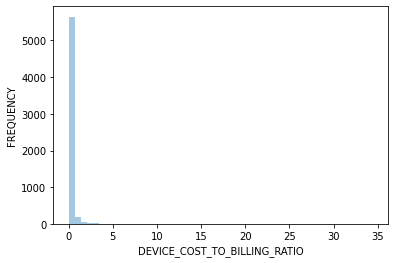

In [657]:
new_dataset["DEVICE_COST_TO_BILLING_RATIO"] = new_dataset["DEVICE_COST_MEAN"] / new_dataset["BILLING_MEAN"]
sns.distplot(new_dataset['DEVICE_COST_TO_BILLING_RATIO'],  kde=False)
plt.ylabel("FREQUENCY")



The variable DEVICE_COST_TO_BILLING_RATIO follows an exponential distribution. It shows a huge decrease where the most of the values are in the first interval, being the second one much smaller than the first one. 

## 2.7. Text parsing/processing

In [658]:
first_split = new_dataset["PURCHASED_DEVICE"].str.split(pat="_", expand=True)
second_split = first_split[1].str.split(pat=" ", n=1, expand = True)
new_dataset["PURCHASED_DEVICE_CODE"] = first_split[0]
new_dataset["PURCHASED_DEVICE_MANUFACTURER"] =second_split[0]
new_dataset["PURCHASED_DEVICE_MODEL"] =second_split[1]
new_dataset

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00000,nan,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,85.00000,22.93000,12.00000,12.00000,12.00000,0.00000,0.12909,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20170401.00000,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,47.00000,9.56000,0.00000,0.00000,0.00000,0.00000,0.00000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00000,nan,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,113.77000,15.37000,0.00000,0.00000,0.00000,0.00000,0.00000,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00000,20171001.00000,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,55.99000,4.94000,6.00000,6.00000,6.00000,0.00000,0.10306,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00000,20190101.00000,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,107.99000,2.70000,0.00000,0.00000,0.00000,0.00000,0.00000,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00000,nan,11032.31700,5755.06540,5755.06540,5290.14750,2917.54980,4494.50200,597.79999,...,160.57000,44.39000,0.00000,0.00000,0.00000,0.00000,0.00000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00000,20170401.00000,24526.06600,14820.21800,14820.21800,19684.52000,10024.08900,7423.10740,247.50000,...,51.67000,1.30000,0.00000,0.00000,0.00000,0.00000,0.00000,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00000,20180401.00000,1007.76560,335.01740,335.01740,171.91273,555.69421,425.69946,88.50000,...,134.99000,0.00000,9.00000,9.00000,9.00000,0.00000,0.06667,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00000,nan,189.17578,155.54840,155.54840,51.75594,62.37141,230.53328,38.50000,...,134.99000,68.54000,0.00000,0.00000,0.00000,0.00000,0.00000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [659]:
#table1 =[new_dataset["PURCHASED_DEVICE_MANUFACTURER"],]
head = ["PURCHASED_DEVICE_MANUFACTURER", "number of devices"]
#print(tabulate(table1, headers=head, tablefmt="grid"))

print("TABLE 1: PURCHASED DEVICE MANUFACTURER\n",new_dataset["PURCHASED_DEVICE_MANUFACTURER"].value_counts())
print("\n**********************************************************")
print("\nTABLE 2: PREVIOUS DEVICE MANUFACTURER\n",new_dataset["PREVIOUS_DEVICE_MANUF"].value_counts())


TABLE 1: PURCHASED DEVICE MANUFACTURER
 LG          3556
SAMSUNG     1094
MOTOROLA     630
APPLE        448
ALCATEL      258
ASUS           2
Name: PURCHASED_DEVICE_MANUFACTURER, dtype: int64

**********************************************************

TABLE 2: PREVIOUS DEVICE MANUFACTURER
 Samsung Korea                              1879
Apple Inc                                  1495
Motorola Mobility LLC, a Lenovo Company     849
LG Electronics Inc.                         506
TCL Communication Ltd                       279
                                           ... 
HTC Corporation                               1
Deere and Company                             1
Lanxun Technology (Hong Kong) Limited         1
Qingdao Haier Telecom Co Ltd                  1
Longconn Electronics (Shenzhen) Co Ltd        1
Name: PREVIOUS_DEVICE_MANUF, Length: 67, dtype: int64


## 2.8. Splitting and sampling a dataset

In [660]:
X_train, X_test = train_test_split(new_dataset, test_size=0.3, random_state=42)

In [661]:
for column_name in ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1','BILLING_MONTH_1']:
    print("************************ TRAINING",column_name,"************************")
    print(X_train[column_name].describe())
    print("************************ TESTING",column_name,"************************")
    print(X_test[column_name].describe())

************************ TRAINING DATA_TRAFFIC_MONTH_1 ************************
count     4191.00000
mean      2549.41337
std       5612.92532
min          0.00000
25%          0.00000
50%        399.49518
75%       2842.25830
max     112421.17000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64
************************ TESTING DATA_TRAFFIC_MONTH_1 ************************
count    1797.00000
mean     2567.66224
std      6135.74549
min         0.00000
25%         0.00000
50%       346.77585
75%      2419.69950
max     97074.61700
Name: DATA_TRAFFIC_MONTH_1, dtype: float64
************************ TRAINING VOICE_TRAFFIC_MONTH_1 ************************
count   4191.00000
mean     132.01747
std      203.66780
min        0.00000
25%       10.20000
50%       64.20000
75%      171.55000
max     4113.00000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64
************************ TESTING VOICE_TRAFFIC_MONTH_1 ************************
count   1797.00000
mean     127.12493
std      191.84289
min        0.

In general the data we have obtained and compared between training and testing shows quite similar results so we can assume the model to be good. It should be noted that the billing_month_1 variable shows more accuracy.

# 3. Comparing iPhone and Samsung J series users

In [662]:
Apple_dataset = new_dataset[new_dataset["PURCHASED_DEVICE_MANUFACTURER"] == 'APPLE']
Samsung_dataset = new_dataset[new_dataset["PURCHASED_DEVICE_MANUFACTURER"] == 'SAMSUNG']
Samsung_dataset = Samsung_dataset[Samsung_dataset["PURCHASED_DEVICE_MODEL"].astype(str).str[0] == 'J']


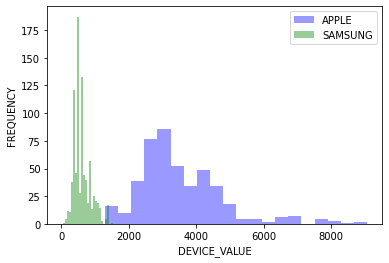

In [663]:
sns.distplot(Apple_dataset['DEVICE_VALUE'], color='b',label ='APPLE', kde = False )
sns.distplot(Samsung_dataset['DEVICE_VALUE'], color='g', label ='SAMSUNG',kde = False)
plt.ylabel("FREQUENCY")
plt.xlabel('DEVICE_VALUE')
plt.legend()


In this histogram we can see that the range of values of Apple is much higher than that of Samsung, highlighting the fact that the lowest value of the Apple device coincides with the most expensive Samsung device.

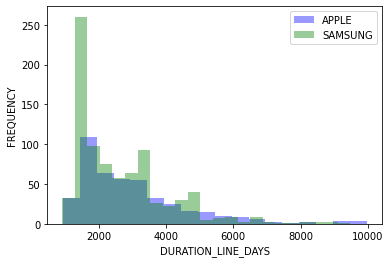

In [664]:
sns.distplot(Apple_dataset['DURATION_LINE'], color='b',label ='APPLE', kde = False )
sns.distplot(Samsung_dataset['DURATION_LINE'], color='g', label ='SAMSUNG',kde = False)
plt.ylabel("FREQUENCY")
plt.xlabel('DURATION_LINE_DAYS')
plt.legend()


Contrary to the previous case, we can see that both distributions are very similar to each other, as well as the ranges of values they reach. It is worth noting that there are a large number of Samsung devices with a much shorter battery life than the rest, while in Apple these values do not differ so much.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>